In [137]:
import pandas as pd

In [138]:
df=pd.read_parquet('/content/drive/MyDrive/Projet_Deep_learning/Api_yaho/eur_usd_max_data.parquet')

In [139]:
df.tail()

,Date,Open,High,Low,Close,Adj Close
5402,2024-09-24,1.111173,1.116346,1.110396,1.111173,1.111173
5403,2024-09-25,1.119119,1.121240,1.114169,1.119119,1.119119
5404,2024-09-26,1.113102,1.118956,1.112681,1.113102,1.113102
5405,2024-09-27,1.117718,1.119984,1.112656,1.117718,1.117718
5406,2024-09-30,1.116445,1.121202,1.115822,1.120323,1.120323


In [140]:

valeur_max = df['Low'].max()

valeur_min = df['Low'].min()

print("Valeur maximale de la colonne:", valeur_max)
print("Valeur minimale de la colonne:", valeur_min)


Valeur maximale de la colonne: 1.58740234375
Valeur minimale de la colonne: 0.07290223985910416


In [141]:
df1=df.reset_index()['Low']

In [142]:
df1

,Low
0,1.194401
1,1.194600
2,1.207700
3,1.204398
4,1.206593
...,...
5402,1.110396
5403,1.114169
5404,1.112681
5405,1.112656


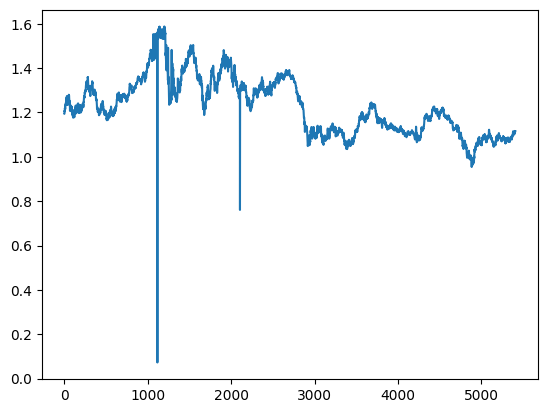

In [143]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [144]:
import numpy as np

In [145]:
df1

,Low
0,1.194401
1,1.194600
2,1.207700
3,1.204398
4,1.206593
...,...
5402,1.110396
5403,1.114169
5404,1.112681
5405,1.112656


In [146]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [147]:
print(df1)

[[0.74050733]
 [0.74063917]
 [0.74928891]
 ...
 [0.68654933]
 [0.68653296]
 [0.68862331]]


In [148]:

training_size=int(len(df1)*0.9)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [149]:
training_size,test_size

(4866, 541)

In [150]:
train_data

array([[0.74050733],
       [0.74063917],
       [0.74928891],
       ...,
       [0.61027778],
       [0.606693  ],
       [0.60892811]])

In [151]:
import numpy

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [152]:

time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [153]:
print(X_train.shape), print(y_train.shape)

(4815, 50)
(4815,)


(None, None)

In [154]:
print(X_test.shape), print(ytest.shape)

(490, 50)
(490,)


(None, None)

In [155]:

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [156]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [157]:
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(50, 1)))
model.add(Dropout(0.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.3))
model.add(GRU(100, return_sequences=True))
model.add(Dropout(0.3))
model.add(GRU(100))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(X_train, y_train, validation_data=(X_test, ytest), 
          epochs=100, batch_size=8, verbose=1, callbacks=[early_stopping])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [158]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 50, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 50, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 50, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_6 (GRU)                          │ (None, 50, 100)             │          60,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 50, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_7 (GRU)                          │ (None, 100)                 │          60,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,501 (947.27 KB)

 Trainable params: 242,501 (947.27 KB)

 Non-trainable params: 0 (0.00 B)

In [160]:
import joblib
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

model_path = '/content/drive/MyDrive/Projet_Deep_learning/models/model_Low.h5'
model.save(model_path)

scaler_filename = '/content/drive/MyDrive/Projet_Deep_learning/models/scaler_Low.pkl'
joblib.dump(scaler, scaler_filename)

In [161]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Projet_Deep_learning/models/model_Low.h5')


In [162]:
import tensorflow as tf

In [163]:
tf.__version__

'2.17.0'

In [164]:

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [165]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [166]:

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.4706440015544617

In [167]:
math.sqrt(mean_squared_error(ytest,test_predict))

0.4109494642553916

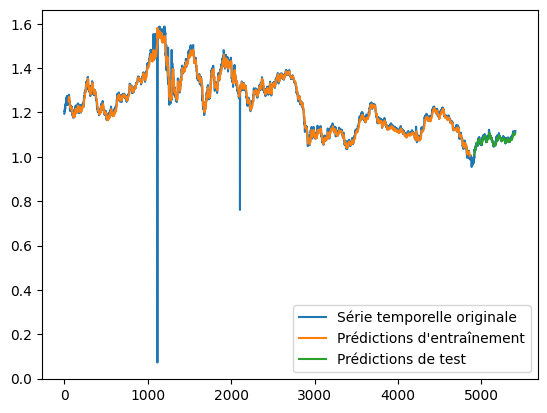

In [168]:
import numpy
look_back=50
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1), label='Série temporelle originale')
plt.plot(trainPredictPlot, label='Prédictions d\'entraînement')
plt.plot(testPredictPlot, label='Prédictions de test')
plt.legend()
plt.show()

In [169]:
len(test_data)

541

In [170]:
var = len(test_data) - time_step
x_input=test_data[var:].reshape(1,-1)
x_input.shape


(1, 50)

In [171]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [172]:
temp_input

[0.6679059259897008,
 0.6667352428323119,
 0.6669055755394047,
 0.6677894322713565,
 0.6651752502621318,
 0.6649672932324927,
 0.6655453539537907,
 0.6635376476877032,
 0.6638446243779349,
 0.6711586982265794,
 0.6718802508725676,
 0.6720294887712034,
 0.6704072350312865,
 0.672210132746609,
 0.6724539037234417,
 0.6726112489551784,
 0.6774026828178648,
 0.674907906869943,
 0.6764392482823682,
 0.6797542029770117,
 0.6829618732540178,
 0.6851459730490307,
 0.6847308461094711,
 0.6852274399398999,
 0.6882700512119274,
 0.6881632390661212,
 0.6851377870039578,
 0.681894853763561,
 0.6817416015543607,
 0.6809839201132913,
 0.6804046787124156,
 0.6808712045695959,
 0.683139998446324,
 0.6826139663384218,
 0.6804851223476507,
 0.679248950829679,
 0.6783606075153314,
 0.6786084715147006,
 0.683059003827286,
 0.6839264097571203,
 0.6856430391512905,
 0.6853821876765653,
 0.6828323920603174,
 0.6872448277785254,
 0.6837803990493305,
 0.6850401054468866,
 0.6875315754919905,
 0.6865493287952208

In [173]:

from numpy import array

lst_output=[]
n_steps=50


if(len(temp_input)>50):

    x_input=np.array(temp_input[1:])

    x_input=x_input.reshape(1,-1)
    x_input = x_input.reshape((1, n_steps, 1))

    yhat = model.predict(x_input, verbose=0)

    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]

    lst_output.extend(yhat.tolist())

else:
    x_input = x_input.reshape((1, n_steps,1))
    yhat = model.predict(x_input, verbose=0)

    temp_input.extend(yhat[0].tolist())

    lst_output.extend(yhat.tolist())
print(lst_output)

[[0.6828802824020386]]


In [174]:

scaled_value = np.array(lst_output) 
original_value = scaler.inverse_transform(scaled_value)

print(original_value)


[[1.1071245]]


In [ ]:
import json
import os


single_value = original_value[0][0] 

filename = '/content/drive/MyDrive/Projet_Deep_learning/notebook_model_classification/output_models.json'


if os.path.exists(filename):
    with open(filename, 'r') as json_file:
        try:
     
            output_dict = json.load(json_file)
        except json.JSONDecodeError:
 
            output_dict = {}
else:

    output_dict = {}

output_dict["low"] = single_value

with open(filename, 'w') as json_file:
    json.dump(output_dict, json_file)

print("La prédiction a été enregistrée dans 'lst_output_with_keys.json' avec la clé 'open'.")


In [175]:
day_new=np.arange(1,51)
day_pred=np.arange(51,52)

In [176]:
import matplotlib.pyplot as plt

In [177]:
len(df1)

5407

In [178]:
len(lst_output)

1

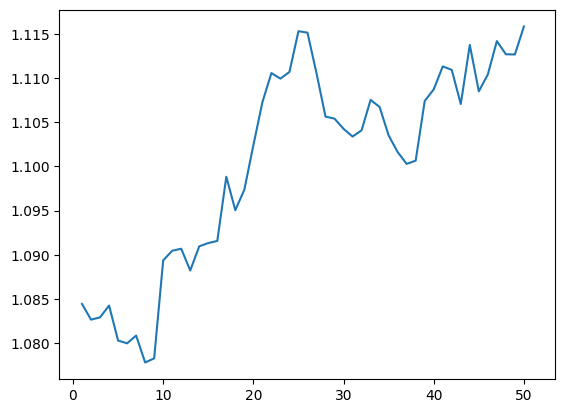

In [179]:
var = len(df1) - time_step
plt.plot(day_new,scaler.inverse_transform(df1[var:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

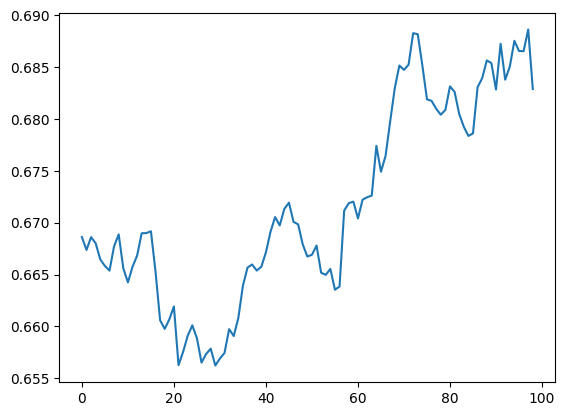

In [180]:
df3=df1.tolist()
df3.extend(lst_output)
var =len(lst_output) - 2 * time_step
plt.plot(df3[var:])

In [181]:
df3=scaler.inverse_transform(df3).tolist()

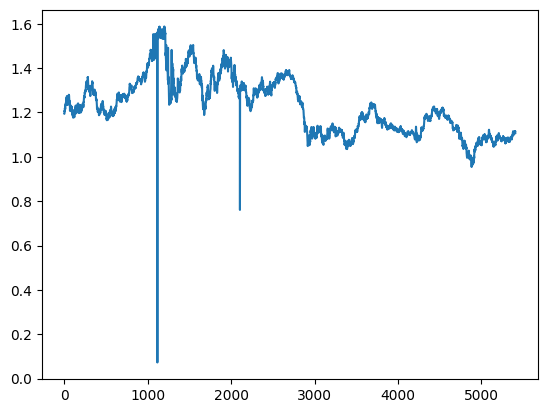

In [182]:
plt.plot(df3)